<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_6_17_Desarrollo_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

#### 1. Carga de Librerías

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Carga y análisis inicial de datos

In [ ]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.shape

(31944, 31)

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [ ]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase.isnull().sum()

CODMES                        0
CODSOLICITUD                  0
DEUDA                         0
PLAZO_CREDITO                 0
FLG_GARANTIA                  0
MIN_MES_DE_DEFAULT            0
FLG_DEFAULT_12M               0
SEGMENTOCLIENTE               0
TARJETA_RELACIONADA           0
VEHICULAR_RELACIONADA         0
HIPOTECARIO_RELACIONADA       0
ATRASO_MAXIMO_ULT_6M          0
ATRASO_MAXIMO_ULT_12M         3
ATRASO_MAXIMO_ULT_24M         7
MESES_AHORROS_ULT_6M        678
MEDIANA_AHORROS_ULT_6M        2
DEUDA_TOTAL_SISTEMA        3181
CLASIF_SISTEMA_ULT_12M        0
FLG_PDH                       0
NUMERO_DE_PAGOS_PDH           0
MONTO_TC_SISTEMA              0
INGRESO_CLIENTE             778
PROFESION                   340
ZONA_DEL_DESEMBOLSO         990
ESTADO_CIVIL                990
EDAD_T                      990
CUOTA                       650
LINEA_DE_TC                 650
MONTO_TC_MEMBRESIA          650
FLG_TC_VISA                   0
FLG_TC_MC                     0
dtype: i

In [ ]:
df_clase.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [ ]:
var_num= df_clase.select_dtypes(include = ["number"])
var_num.head()

,DEUDA,PLAZO_CREDITO,FLG_DEFAULT_12M,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
0,7116.681318,48,0,0,0.0,0.0,6.0,3772.486272,5450.35,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0
1,1616.555000,60,0,0,0.0,0.0,6.0,8389.745000,0.00,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0
2,8082.775000,48,0,0,0.0,0.0,6.0,1842.695000,0.00,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0
3,10186.990760,48,1,0,0.0,0.0,6.0,4514.070000,5661.25,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0
4,10777.033330,48,0,0,0.0,0.0,6.0,7848.908333,0.00,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0


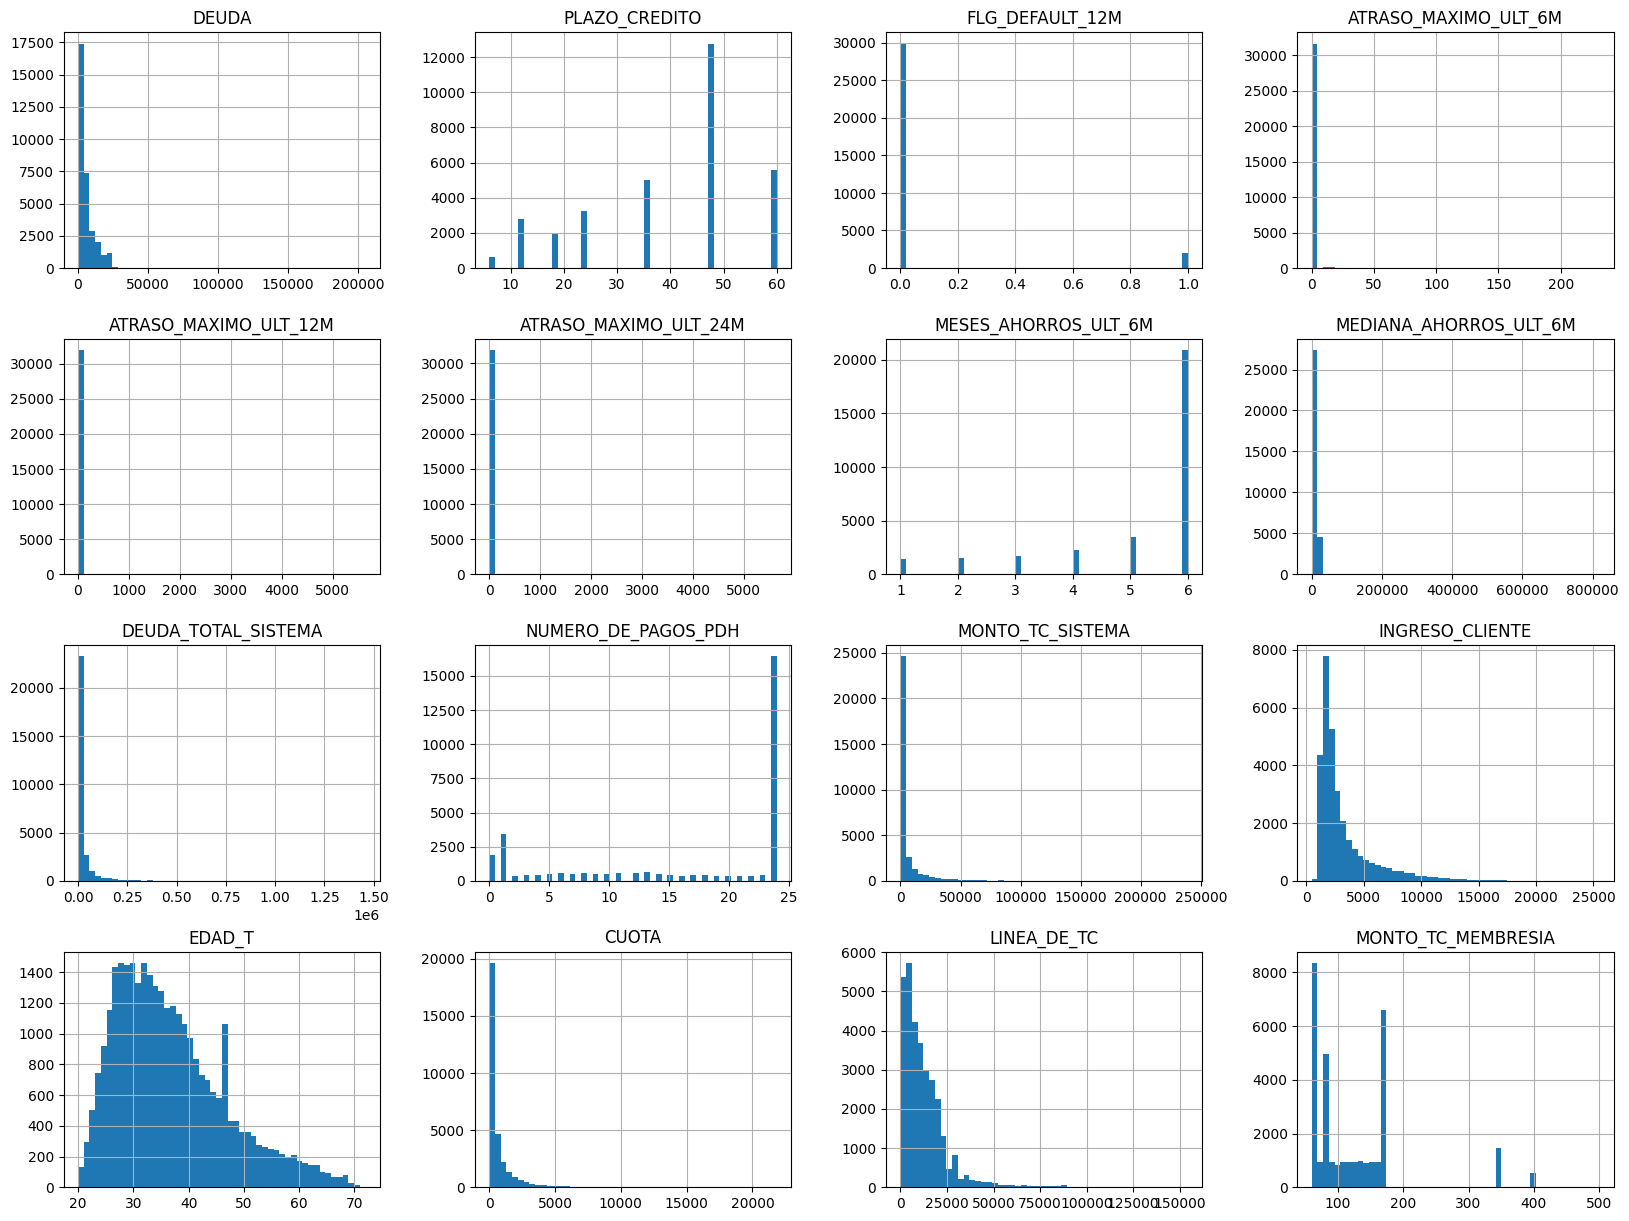

In [ ]:
df_clase[var_num.columns].hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

0    29920
1     2024
Name: FLG_DEFAULT_12M, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


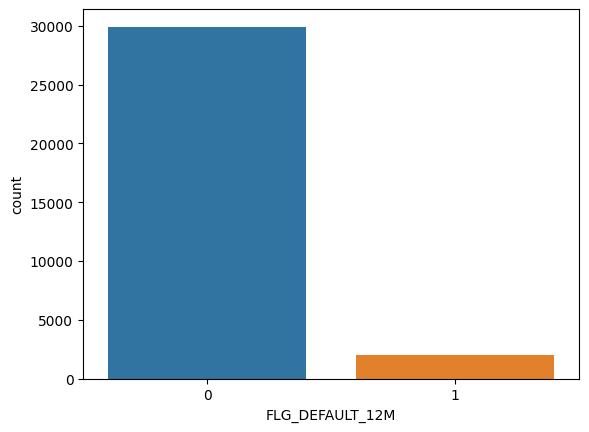

In [ ]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

### 2.2 Analicemos la volumetría en el tiempo

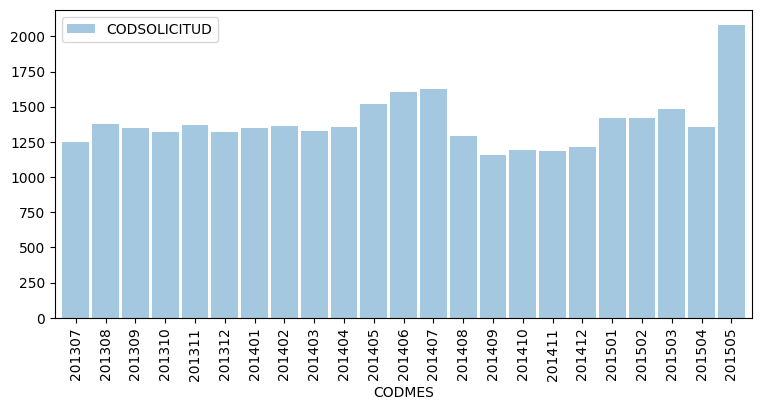

In [ ]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

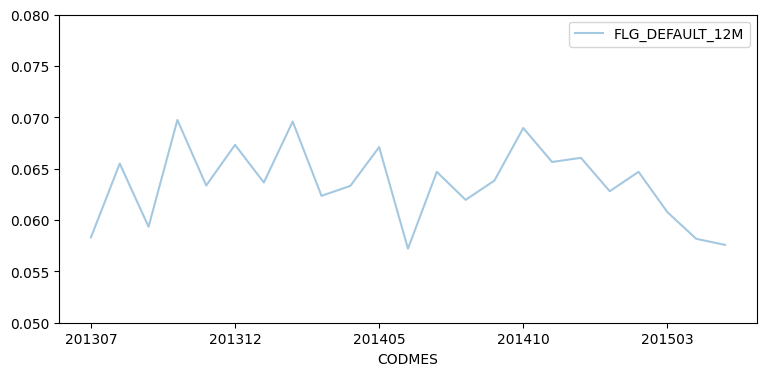

In [ ]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

#### 3.1 Análisis Univariado

### Valores Perdidos (Missing)

In [ ]:
import missingno as msno

<Axes: >

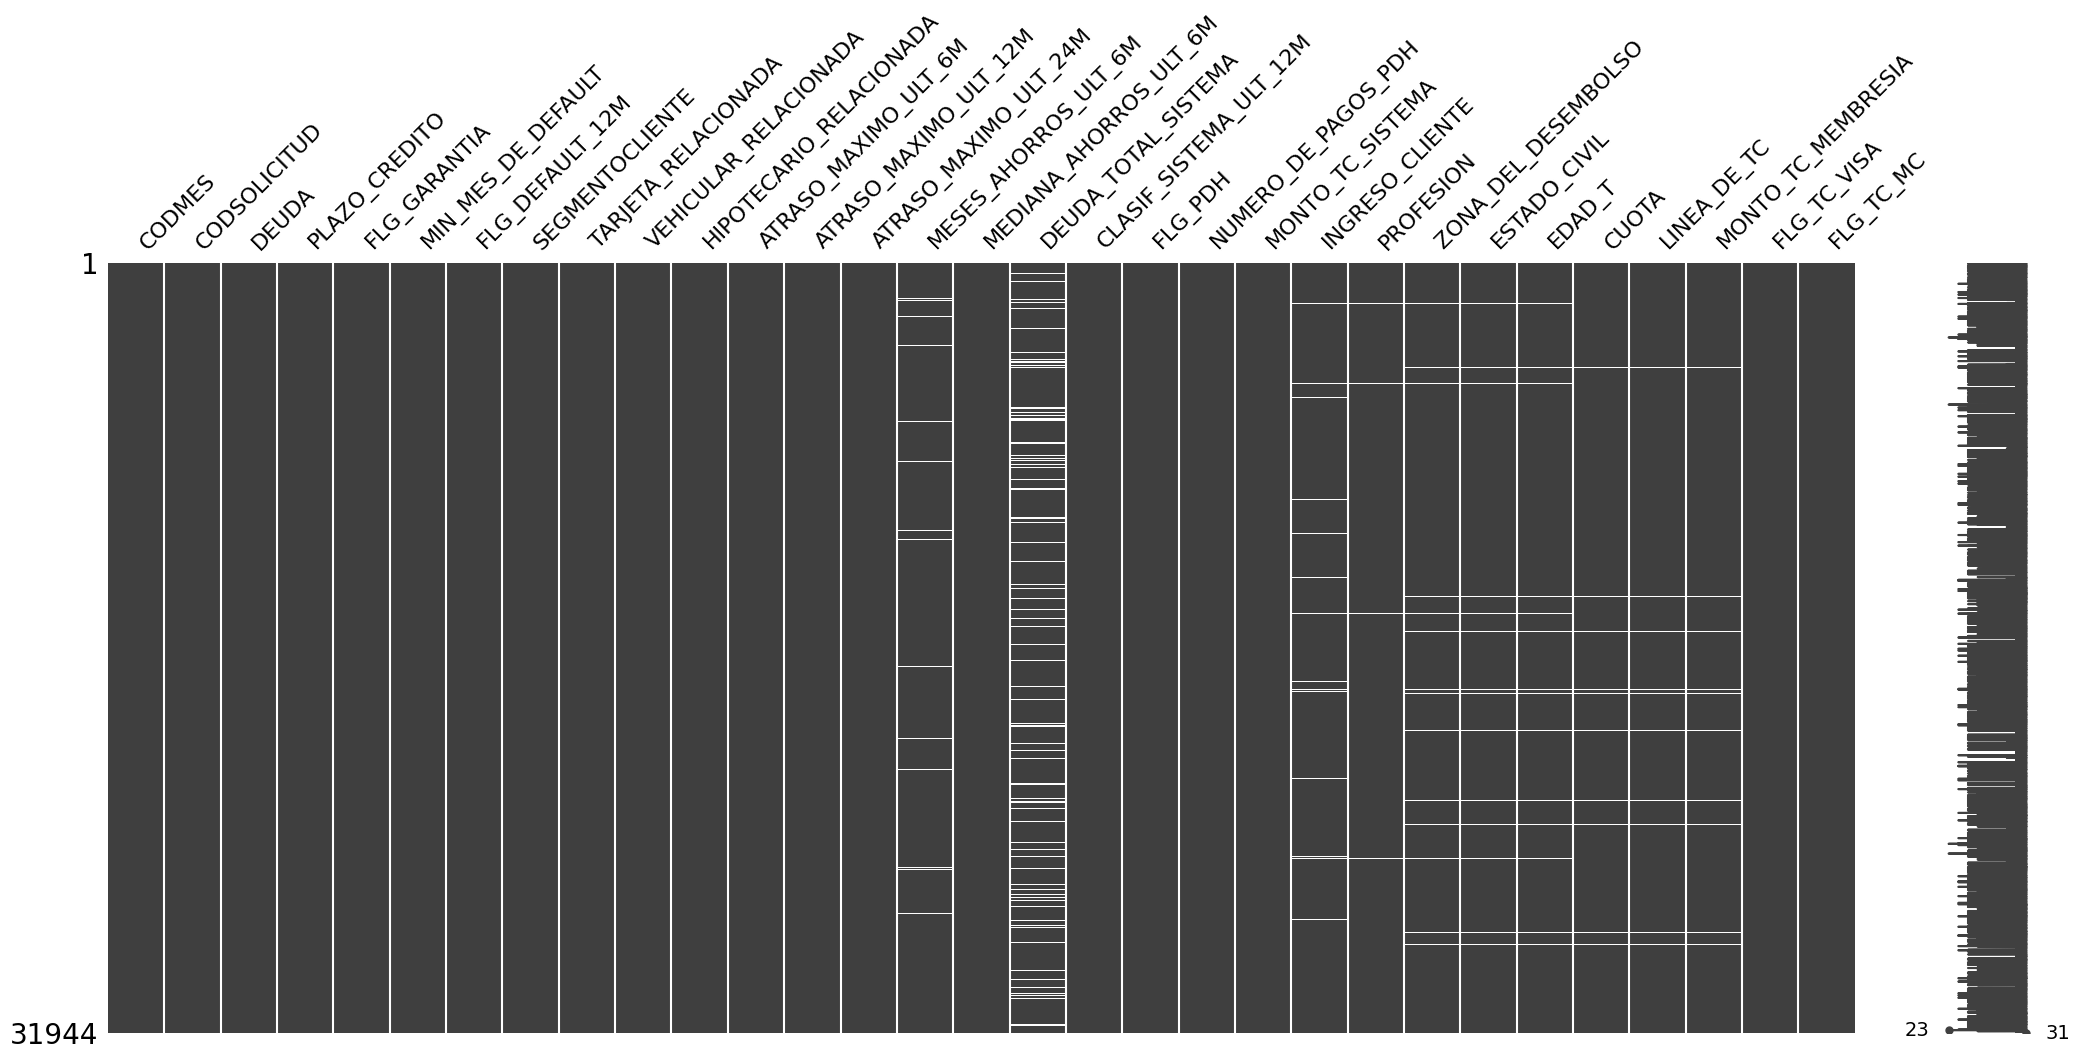

In [ ]:
msno.matrix(df_clase)

<Axes: >

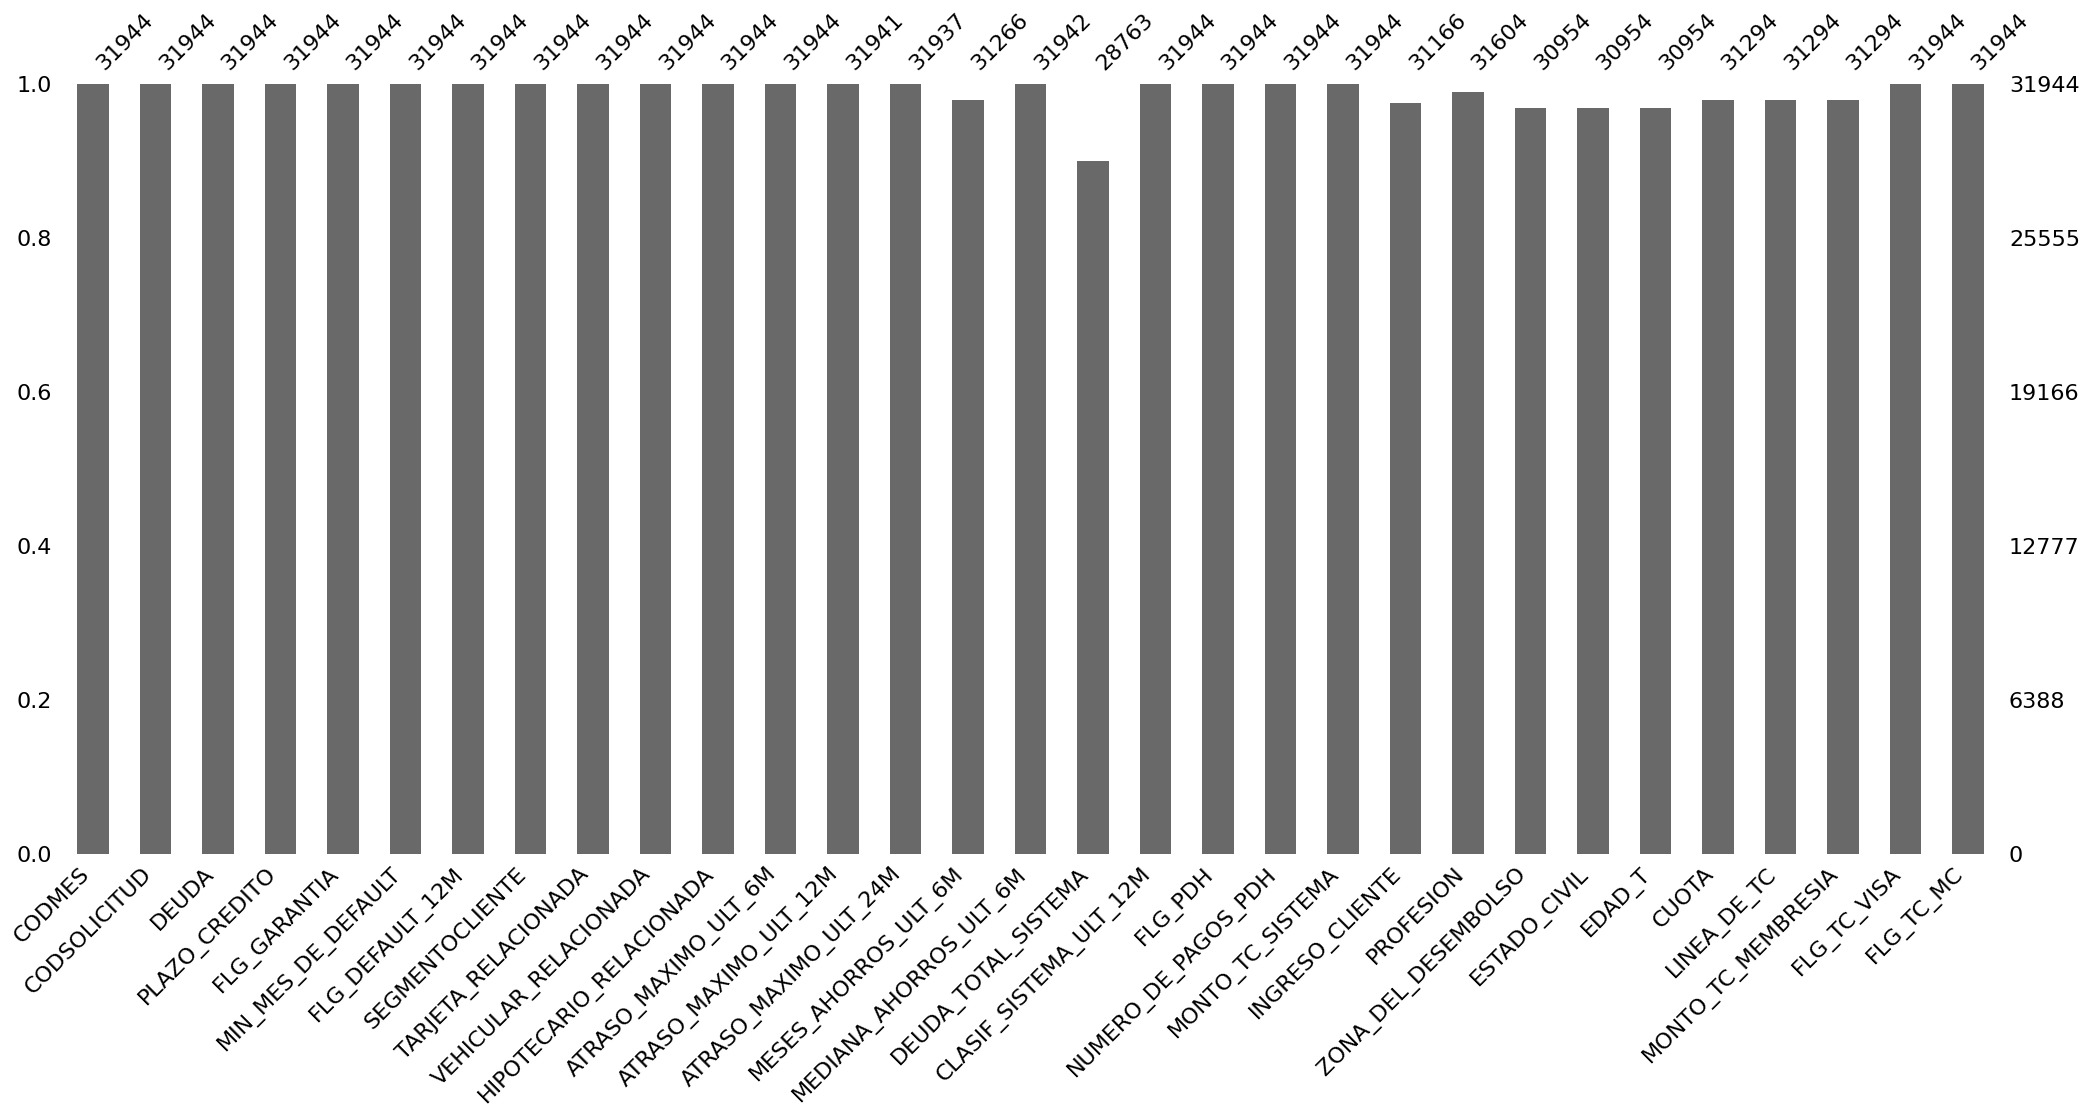

In [ ]:
msno.bar(df_clase)

<Axes: >

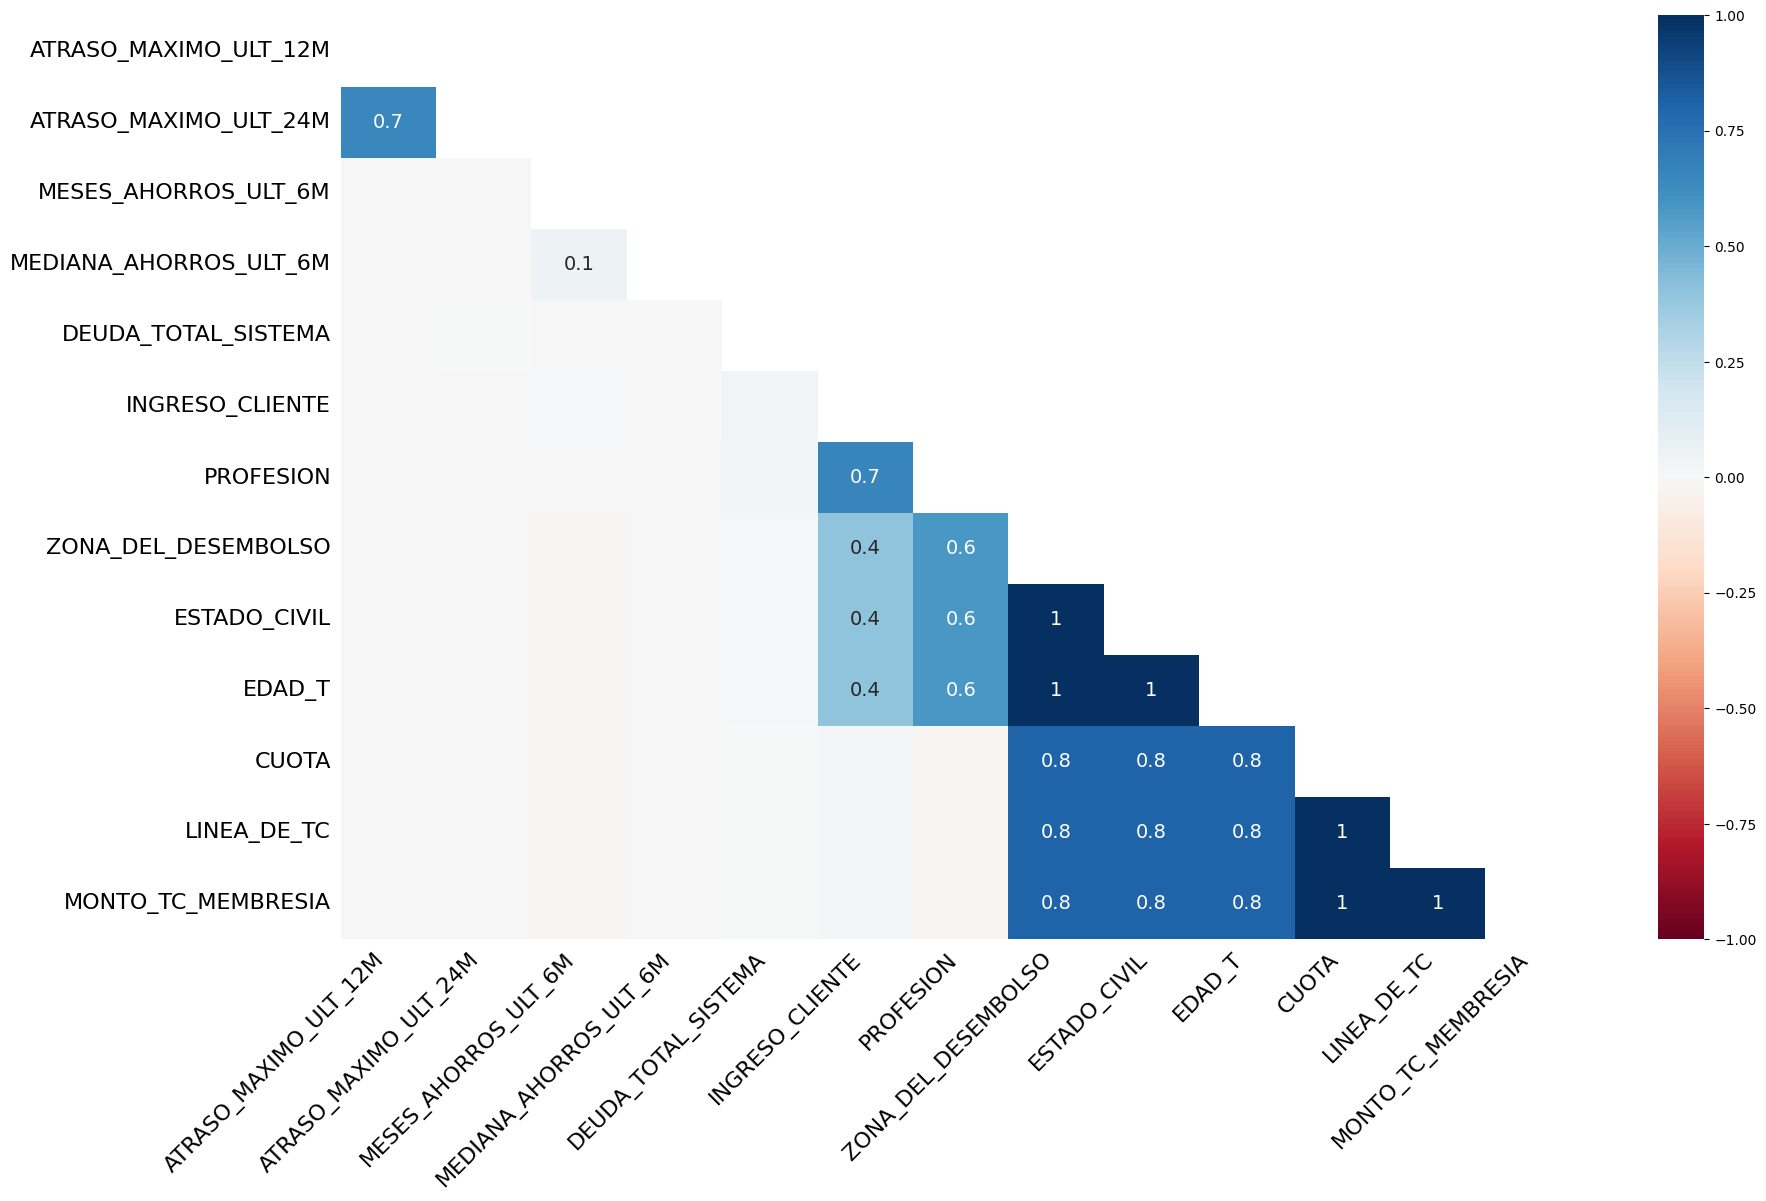

In [ ]:
msno.heatmap(df_clase)

In [ ]:
def valores_inexistentes_col(df):
  n_records = len(df)
  for columna in df:
    print("{} | {} | {}".format(
        df[columna].name, round((len(df[df[columna].isnull()]) / (1.0*n_records))*100,2), df[columna].dtype
        ))

In [ ]:
valores_inexistentes_col(df_clase)

CODMES | 0.0 | object
CODSOLICITUD | 0.0 | object
DEUDA | 0.0 | float64
PLAZO_CREDITO | 0.0 | int64
FLG_GARANTIA | 0.0 | object
MIN_MES_DE_DEFAULT | 0.0 | object
FLG_DEFAULT_12M | 0.0 | int64
SEGMENTOCLIENTE | 0.0 | object
TARJETA_RELACIONADA | 0.0 | object
VEHICULAR_RELACIONADA | 0.0 | object
HIPOTECARIO_RELACIONADA | 0.0 | object
ATRASO_MAXIMO_ULT_6M | 0.0 | int64
ATRASO_MAXIMO_ULT_12M | 0.01 | float64
ATRASO_MAXIMO_ULT_24M | 0.02 | float64
MESES_AHORROS_ULT_6M | 2.12 | float64
MEDIANA_AHORROS_ULT_6M | 0.01 | float64
DEUDA_TOTAL_SISTEMA | 9.96 | float64
CLASIF_SISTEMA_ULT_12M | 0.0 | object
FLG_PDH | 0.0 | object
NUMERO_DE_PAGOS_PDH | 0.0 | int64
MONTO_TC_SISTEMA | 0.0 | float64
INGRESO_CLIENTE | 2.44 | float64
PROFESION | 1.06 | object
ZONA_DEL_DESEMBOLSO | 3.1 | object
ESTADO_CIVIL | 3.1 | object
EDAD_T | 3.1 | float64
CUOTA | 2.03 | float64
LINEA_DE_TC | 2.03 | float64
MONTO_TC_MEMBRESIA | 2.03 | float64
FLG_TC_VISA | 0.0 | object
FLG_TC_MC | 0.0 | object


In [ ]:
#df_clase["ATRASO_MAXIMO_ULT_12M"] = df_clase["ATRASO_MAXIMO_ULT_12M"].fillna(df_clase["ATRASO_MAXIMO_ULT_12M"].mean())
#df_clase["DEUDA_TOTAL_SISTEMA"] = df_clase["DEUDA_TOTAL_SISTEMA"].fillna(0)

### Valores Atípicos (Outliers)

In [ ]:
from scipy import stats
import numpy as np

def outliers_col(df):
  for columna in df:
    if df[columna].dtype != np.object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers = len(df[(df[columna]<lim_inf) | (df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers,
          df[columna].dtype
          ))

In [ ]:
outliers_col(df_clase)

DEUDA | 2126 | float64
PLAZO_CREDITO | 0 | int64
FLG_DEFAULT_12M | 2024 | int64
ATRASO_MAXIMO_ULT_6M | 2005 | int64
ATRASO_MAXIMO_ULT_12M | 4154 | float64
ATRASO_MAXIMO_ULT_24M | 6634 | float64
MESES_AHORROS_ULT_6M | 4635 | float64
MEDIANA_AHORROS_ULT_6M | 3318 | float64
DEUDA_TOTAL_SISTEMA | 1880 | float64
NUMERO_DE_PAGOS_PDH | 0 | int64
MONTO_TC_SISTEMA | 4470 | float64
INGRESO_CLIENTE | 2512 | float64
EDAD_T | 350 | float64
CUOTA | 2867 | float64
LINEA_DE_TC | 1200 | float64
MONTO_TC_MEMBRESIA | 2015 | float64


<Axes: >

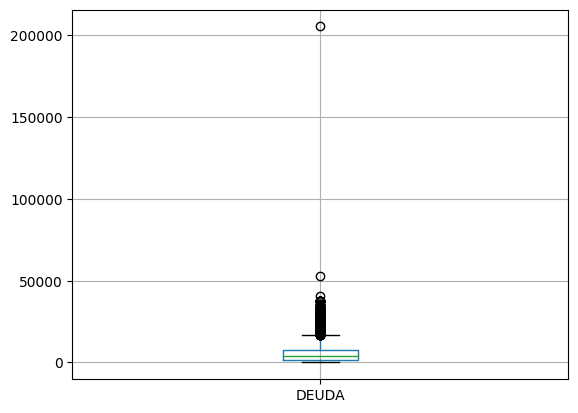

In [ ]:
df_clase.boxplot(column=['DEUDA'])

In [ ]:
df_clase['DEUDA'].describe()

count     31944.000000
mean       5769.284906
std        5848.504517
min           8.791365
25%        1602.717111
50%        3768.298333
75%        7786.406583
max      205483.523000
Name: DEUDA, dtype: float64

In [ ]:
df_clase['DEUDA'].quantile(np.arange(0,1,0.1))

0.0        8.791365
0.1      808.277500
0.2     1347.129167
0.3     1941.249724
0.4     2694.258333
0.5     3768.298333
0.6     5065.051667
0.7     6664.541667
0.8     9284.689425
0.9    14373.366500
Name: DEUDA, dtype: float64

In [ ]:
df_clase['DEUDA'].quantile(np.arange(0.9,1,0.01))

0.90    14373.366500
0.91    15195.155000
0.92    15994.900000
0.93    16634.583367
0.94    17893.882865
0.95    18859.808330
0.96    20327.426215
0.97    21815.736782
0.98    23325.895830
0.99    23574.760420
Name: DEUDA, dtype: float64

In [ ]:
#df_clase['DEUDA'] = df_clase.where(df_clase['DEUDA']<18859.808330, 18859.808330)["DEUDA"]

#### 3.2 Análisis Bivariado

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CLASIF_SISTEMA_ULT_12M'].value_counts()

0.0    23640
1.0     3978
nan     1667
2.0     1100
4.0      996
3.0      563
Name: CLASIF_SISTEMA_ULT_12M, dtype: int64

In [ ]:
def bivariado_plot_cat(df, columna, default):
  aux = df[[default,columna]]
  aux = aux.groupby(columna)[default].mean().reset_index()
  sns.lineplot(x = columna, y = default, data = aux)
  plt.xlabel(columna)
  plt.show()

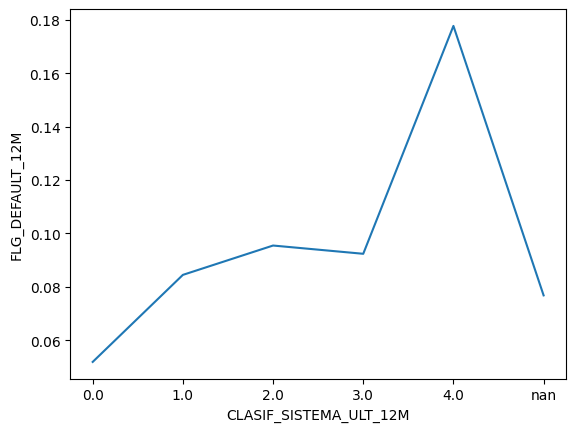

In [ ]:
bivariado_plot_cat(df_clase,'CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M')

In [ ]:
T=df_clase[['CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M']].groupby(['CLASIF_SISTEMA_ULT_12M'], as_index=False).agg(['count','sum','mean'])
T.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
T

FLG_DEFAULT_12M                
                                 total  bads  bad_rate
CLASIF_SISTEMA_ULT_12M                                
0.0                              23640  1226  0.051861
1.0                               3978   336  0.084465
2.0                               1100   105  0.095455
3.0                                563    52  0.092362
4.0                                996   177  0.177711
nan                               1667   128  0.076785

In [ ]:
def bivariado_plot_num(df, columna, default, bins):
  aux = df[[default, columna]]
  aux["Var"] = pd.qcut(aux[columna],bins, labels=False)
  aux = aux.groupby("Var")[default].mean().reset_index()
  sns.lineplot(x = 'Var', y = default, data = aux, markers=True, dashes=False)
  plt.xlabel(columna)
  plt.show()

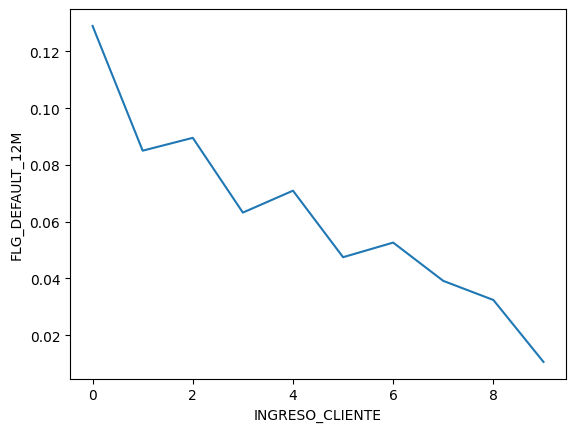

In [ ]:
bivariado_plot_num(df_clase,'INGRESO_CLIENTE','FLG_DEFAULT_12M',10)

In [ ]:
A=pd.qcut(x=df_clase['INGRESO_CLIENTE'],q=10,labels=False)
B=df_clase[['FLG_DEFAULT_12M', 'INGRESO_CLIENTE']].groupby(A)['FLG_DEFAULT_12M'].agg(['count','sum','mean']).reset_index()
B.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
B

,INGRESO_CLIENTE,total,bads,bad_rate
0,0.0,3117,402,0.128970
1,1.0,3117,265,0.085018
2,2.0,3116,279,0.089538
3,3.0,3117,197,0.063202
4,4.0,3116,221,0.070924
5,5.0,3117,148,0.047482
6,6.0,3116,164,0.052632
7,7.0,3117,122,0.039140
8,8.0,3116,101,0.032413
9,9.0,3117,33,0.010587


### 3.3 Analizaremos las Interacciones entre variables

### Correlaciones

In [ ]:
df_clase.corr()

,DEUDA,PLAZO_CREDITO,FLG_DEFAULT_12M,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
DEUDA,1.000000,0.563483,0.016840,0.011512,-0.003455,-0.003098,0.133302,0.284829,0.347254,-0.109651,0.388112,0.452504,0.147920,0.473427,0.266316,0.326340
PLAZO_CREDITO,0.563483,1.000000,0.068333,0.022457,-0.003804,0.000413,0.048946,0.149256,0.225000,-0.034037,0.239272,0.244348,0.045946,0.321024,0.124693,0.151804
FLG_DEFAULT_12M,0.016840,0.068333,1.000000,0.010726,0.015422,0.013493,-0.110649,-0.098969,-0.025431,-0.107763,-0.006700,-0.101125,-0.065376,-0.017087,-0.060135,-0.049768
ATRASO_MAXIMO_ULT_6M,0.011512,0.022457,0.010726,1.000000,0.083028,0.078199,-0.040203,-0.004495,0.030198,-0.017221,0.014766,0.004088,0.010250,0.027450,-0.011218,0.001030
ATRASO_MAXIMO_ULT_12M,-0.003455,-0.003804,0.015422,0.083028,1.000000,0.822126,-0.023398,-0.001436,0.000114,-0.002735,-0.002195,-0.006061,-0.001312,-0.000237,-0.004734,-0.002998
ATRASO_MAXIMO_ULT_24M,-0.003098,0.000413,0.013493,0.078199,0.822126,1.000000,-0.024684,-0.007211,-0.002469,-0.009444,-0.003688,-0.010092,0.006465,-0.001355,-0.008129,-0.008661
MESES_AHORROS_ULT_6M,0.133302,0.048946,-0.110649,-0.040203,-0.023398,-0.024684,1.000000,0.227005,0.074298,0.072479,0.045134,0.284736,-0.011234,0.085142,0.151250,0.141160
MEDIANA_AHORROS_ULT_6M,0.284829,0.149256,-0.098969,-0.004495,-0.001436,-0.007211,0.227005,1.000000,0.205670,0.104674,0.126633,0.545248,0.191158,0.210583,0.272078,0.262680
DEUDA_TOTAL_SISTEMA,0.347254,0.225000,-0.025431,0.030198,0.000114,-0.002469,0.074298,0.205670,1.000000,-0.042258,0.475576,0.558708,0.129350,0.804898,0.315826,0.344950
NUMERO_DE_PAGOS_PDH,-0.109651,-0.034037,-0.107763,-0.017221,-0.002735,-0.009444,0.072479,0.104674,-0.042258,1.000000,-0.071905,0.033523,0.012417,-0.059385,-0.004688,-0.053763


# 4. Feature Engineering

#### 4.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [ ]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [ ]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [ ]:
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [ ]:
X_train.isnull().mean().where(X_train.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
DEUDA                           NaN
PLAZO_CREDITO                   NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
ATRASO_MAXIMO_ULT_6M            NaN
ATRASO_MAXIMO_ULT_12M      0.000045
ATRASO_MAXIMO_ULT_24M      0.000179
MESES_AHORROS_ULT_6M       0.020081
MEDIANA_AHORROS_ULT_6M     0.000089
DEUDA_TOTAL_SISTEMA        0.100134
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
NUMERO_DE_PAGOS_PDH             NaN
MONTO_TC_SISTEMA                NaN
INGRESO_CLIENTE            0.024240
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.030367
CUOTA                      0.020081
LINEA_DE_TC                0.020081
MONTO_TC_MEMBRESIA         0

In [ ]:
# Empecemos con los numéricos
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                          NaN
PLAZO_CREDITO                  NaN
ATRASO_MAXIMO_ULT_6M           NaN
ATRASO_MAXIMO_ULT_12M     0.000045
ATRASO_MAXIMO_ULT_24M     0.000179
MESES_AHORROS_ULT_6M      0.020081
MEDIANA_AHORROS_ULT_6M    0.000089
DEUDA_TOTAL_SISTEMA       0.100134
NUMERO_DE_PAGOS_PDH            NaN
MONTO_TC_SISTEMA               NaN
INGRESO_CLIENTE           0.024240
EDAD_T                    0.030367
CUOTA                     0.020081
LINEA_DE_TC               0.020081
MONTO_TC_MEMBRESIA        0.020081
dtype: float64

In [ ]:
# Aplicaremos el imputador de missing
imputer_1 = MeanMedianImputer(
    imputation_method='median',
    variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'],
)

imputer_1.fit(X_train)

MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE'])

In [ ]:
# dejamos 'CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M',
#         'ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA'

In [ ]:
imputer_1.variables_

['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE']

In [ ]:
imputer_1.imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
X_train[imputer_1.variables_].median()

LINEA_DE_TC        9609.000000
EDAD_T               35.000000
INGRESO_CLIENTE    2271.177355
dtype: float64

In [ ]:
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

In [ ]:
X_train_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
X_test_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
imputer_2 = ArbitraryNumberImputer(
    arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
)

imputer_2.fit(X_train)

#imputer_2 = ArbitraryNumberImputer(
#    imputer_dict={
#        'CUOTA': -999,
#        'DEUDA_TOTAL_SISTEMA': -999,
#        'MEDIANA_AHORROS_ULT_6M': -1,
#        'MESES_AHORROS_ULT_6M': -1,
#        'ATRASO_MAXIMO_ULT_24M': 0,
#        'ATRASO_MAXIMO_ULT_12M': 0,
#        'MONTO_TC_MEMBRESIA': 0
#    }
#)
#
#imputer_2.fit(X_train)


ArbitraryNumberImputer(arbitrary_number=0,
                       variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA',
                                  'MEDIANA_AHORROS_ULT_6M',
                                  'MESES_AHORROS_ULT_6M',
                                  'ATRASO_MAXIMO_ULT_24M',
                                  'ATRASO_MAXIMO_ULT_12M',
                                  'MONTO_TC_MEMBRESIA'])

In [ ]:
imputer_2.variables_

['CUOTA',
 'DEUDA_TOTAL_SISTEMA',
 'MEDIANA_AHORROS_ULT_6M',
 'MESES_AHORROS_ULT_6M',
 'ATRASO_MAXIMO_ULT_24M',
 'ATRASO_MAXIMO_ULT_12M',
 'MONTO_TC_MEMBRESIA']

In [ ]:
imputer_2.arbitrary_number

0

In [ ]:
X_train_t = imputer_2.transform(X_train_t)
X_test_t = imputer_2.transform(X_test_t)

In [ ]:
X_train_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
X_test_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
#X_train.hist(bins = 50, figsize=(20,15))
#plt.show()

In [ ]:
var_num = X_train_t.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                    NaN
PLAZO_CREDITO            NaN
ATRASO_MAXIMO_ULT_6M     NaN
ATRASO_MAXIMO_ULT_12M    NaN
ATRASO_MAXIMO_ULT_24M    NaN
MESES_AHORROS_ULT_6M     NaN
MEDIANA_AHORROS_ULT_6M   NaN
DEUDA_TOTAL_SISTEMA      NaN
NUMERO_DE_PAGOS_PDH      NaN
MONTO_TC_SISTEMA         NaN
INGRESO_CLIENTE          NaN
EDAD_T                   NaN
CUOTA                    NaN
LINEA_DE_TC              NaN
MONTO_TC_MEMBRESIA       NaN
dtype: float64

In [ ]:
# Usemos Pipelines para concatenar diferentes métodos de imputación
pipe_1 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(
                imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']
            ),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(
                arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
        ),
        ),
    ]
)

In [ ]:
pipe_1.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA']))])

In [ ]:
pipe_1.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
pipe_1.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [ ]:
X_train_t = pipe_1.transform(X_train)
X_test_t = pipe_1.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.011477
ZONA_DEL_DESEMBOLSO        0.032450
ESTADO_CIVIL               0.032450
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

In [ ]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
FLG_TC_VISA                     NaN
FLG_TC_MC                       NaN
dtype: float64

In [ ]:
from feature_engine.imputation import CategoricalImputer

In [ ]:
imputer_3 = CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
# si no se especifica el método de imputación, le imputará el valor "Missing"
imputer_3.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['PROFESION', 'ZONA_DEL_DESEMBOLSO',
                              'ESTADO_CIVIL'])

In [ ]:
imputer_3.variables_

['PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL']

In [ ]:
imputer_3.imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [ ]:
X_train_t = imputer_3.transform(X_train_t)
X_test_t = imputer_3.transform(X_test_t)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [ ]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [ ]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [286]:
from feature_engine.encoding import OneHotEncoder

In [293]:
encoder_1 = OneHotEncoder(
    variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
               'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],  # aquí también se puede dejar en None
    drop_last=True,  # generará k-1 variables dummy (donde k es el total de categorias de la variable)
)


encoder_1.fit(X_train_t)

OneHotEncoder(drop_last=True,
              variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE',
                         'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
                         'HIPOTECARIO_RELACIONADA', 'CLASIF_SISTEMA_ULT_12M',
                         'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO',
                         'ESTADO_CIVIL', 'FLG_TC_VISA', 'FLG_TC_MC'])

In [294]:
encoder_1.variables_

['FLG_GARANTIA',
 'SEGMENTOCLIENTE',
 'TARJETA_RELACIONADA',
 'VEHICULAR_RELACIONADA',
 'HIPOTECARIO_RELACIONADA',
 'CLASIF_SISTEMA_ULT_12M',
 'FLG_PDH',
 'PROFESION',
 'ZONA_DEL_DESEMBOLSO',
 'ESTADO_CIVIL',
 'FLG_TC_VISA',
 'FLG_TC_MC']

In [295]:
encoder_1.encoder_dict_

{'FLG_GARANTIA': ['0'],
 'SEGMENTOCLIENTE': ['CLIENTES PLATINUM SEGM 2',
  'CLIENTES ORO',
  'CLIENTES SIGNATURE',
  'CLIENTES PLATINUM SEGM 1',
  'CLIENTES BLACK - CAT2',
  'CLIENTES MASIVOS'],
 'TARJETA_RELACIONADA': ['1'],
 'VEHICULAR_RELACIONADA': ['0'],
 'HIPOTECARIO_RELACIONADA': ['0'],
 'CLASIF_SISTEMA_ULT_12M': ['0.0', '1.0', '4.0', 'nan', '2.0'],
 'FLG_PDH': ['1'],
 'PROFESION': ['ADMINISTRADOR',
  'CONTADOR',
  'MIEMBRO DE LAS FUERZAS ARMADAS',
  'TECNICO',
  'INGENIERO',
  'TOPOGRAFO',
  'ENFERMERO',
  'TEC MECANICO AUTOMOTRIZ',
  'OBRERO / OPERADOR',
  'ASISTENTE SOCIAL',
  'QUIMICO FARMACEUTICO',
  'TEC QUIMICO LAB.INDUST',
  'TECNICO EN ELECTRONICA',
  'EDUCADOR',
  'TECNICO EN COMPUTACION',
  'MEDICO',
  'ABOGADO',
  'TEC ELECTRICIDAD INDUST',
  'INGENIERO DE SISTEMAS',
  'NO DIO INFORMACION SOLICITADA',
  'MECANICO',
  'INGENIERO QUIMICO',
  'INGENIERO MECANICO',
  'PROFESOR',
  'TEC ADMINIST.EMPRESAS',
  'ARQUITECTO',
  'ECONOMISTA',
  'NUTRICIONISTA',
  'TECNICO EN PE

In [296]:
X_train_enc = encoder_1.transform(X_train_t)
X_test_enc = encoder_1.transform(X_test_t)

In [297]:
X_train_enc.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,MIN_MES_DE_DEFAULT,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,...,ZONA_DEL_DESEMBOLSO_TUMBES,ESTADO_CIVIL_SOL,ESTADO_CIVIL_SEP,ESTADO_CIVIL_CAS,ESTADO_CIVIL_VIU,ESTADO_CIVIL_CON,FLG_TC_VISA_0.0,FLG_TC_VISA_1.0,FLG_TC_MC_0.0,FLG_TC_MC_1.0
1517,201403,1518,17512.679170,60,nan,0,0.0,0.0,6.0,15637.226670,...,0,1,0,0,0,0,1,0,1,0
27337,201503,27338,2932.398333,48,nan,0,0.0,0.0,0.0,7485.403333,...,0,1,0,0,0,0,0,1,0,1
573,201309,574,4790.418259,48,nan,0,0.0,0.0,6.0,4379.153333,...,0,0,1,0,0,0,0,1,0,1
31740,201505,31741,824.938742,48,nan,0,0.0,0.0,6.0,7878.775000,...,0,0,0,1,0,0,0,1,0,1
25079,201504,25080,2665.816667,24,nan,0,0.0,0.0,6.0,3375.898333,...,0,0,0,1,0,0,1,0,1,0


In [298]:
encoder_1.get_feature_names_out()

['CODMES',
 'CODSOLICITUD',
 'DEUDA',
 'PLAZO_CREDITO',
 'MIN_MES_DE_DEFAULT',
 'ATRASO_MAXIMO_ULT_6M',
 'ATRASO_MAXIMO_ULT_12M',
 'ATRASO_MAXIMO_ULT_24M',
 'MESES_AHORROS_ULT_6M',
 'MEDIANA_AHORROS_ULT_6M',
 'DEUDA_TOTAL_SISTEMA',
 'NUMERO_DE_PAGOS_PDH',
 'MONTO_TC_SISTEMA',
 'INGRESO_CLIENTE',
 'EDAD_T',
 'CUOTA',
 'LINEA_DE_TC',
 'MONTO_TC_MEMBRESIA',
 'FLG_GARANTIA_0',
 'SEGMENTOCLIENTE_CLIENTES PLATINUM SEGM 2',
 'SEGMENTOCLIENTE_CLIENTES ORO',
 'SEGMENTOCLIENTE_CLIENTES SIGNATURE',
 'SEGMENTOCLIENTE_CLIENTES PLATINUM SEGM 1',
 'SEGMENTOCLIENTE_CLIENTES BLACK - CAT2',
 'SEGMENTOCLIENTE_CLIENTES MASIVOS',
 'TARJETA_RELACIONADA_1',
 'VEHICULAR_RELACIONADA_0',
 'HIPOTECARIO_RELACIONADA_0',
 'CLASIF_SISTEMA_ULT_12M_0.0',
 'CLASIF_SISTEMA_ULT_12M_1.0',
 'CLASIF_SISTEMA_ULT_12M_4.0',
 'CLASIF_SISTEMA_ULT_12M_nan',
 'CLASIF_SISTEMA_ULT_12M_2.0',
 'FLG_PDH_1',
 'PROFESION_ADMINISTRADOR',
 'PROFESION_CONTADOR',
 'PROFESION_MIEMBRO DE LAS FUERZAS ARMADAS',
 'PROFESION_TECNICO',
 'PROFESION_

In [ ]:
# El codificador que elijamos también se puede incluir en los pipelines anteriormente creados

In [300]:
from feature_engine.encoding import WoEEncoder

In [305]:
woe_enc_1 = WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
               'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'], fill_value=0)

woe_enc_1.fit(X_train_t, y_train)

WoEEncoder(fill_value=0,
           variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE', 'TARJETA_RELACIONADA',
                      'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
                      'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
                      'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_TC_VISA',
                      'FLG_TC_MC'])

In [306]:
woe_enc_1.encoder_dict_

{'FLG_GARANTIA': {'0': 0.033387928077517115, '1': -1.2675506686497473},
 'SEGMENTOCLIENTE': {'CLIENTES BLACK - CAT1': -inf,
  'CLIENTES BLACK - CAT2': -inf,
  'CLIENTES MASIVOS': 2.6932625009478306,
  'CLIENTES ORO': 0.15188430561830224,
  'CLIENTES PLATINUM SEGM 1': -0.6148444576483127,
  'CLIENTES PLATINUM SEGM 2': -0.4195458446417238,
  'CLIENTES SIGNATURE': -1.203646866670267},
 'TARJETA_RELACIONADA': {'0': -0.1267223037452037, '1': 0.06940534238733007},
 'VEHICULAR_RELACIONADA': {'0': 0.0025258510764949852,
  '1': -0.2794802543814616},
 'HIPOTECARIO_RELACIONADA': {'0': 0.017668923822407825,
  '1': -1.2424770310976314},
 'CLASIF_SISTEMA_ULT_12M': {'0.0': -0.22907160765129253,
  '1.0': 0.34445921077738206,
  '2.0': 0.4858560174664919,
  '3.0': 0.39595446505462883,
  '4.0': 1.1686211251738072,
  'nan': 0.2509154655786265},
 'FLG_PDH': {'0': 0.6316144675821889, '1': -0.17122036037774935},
 'PROFESION': {'999': 2.000115320387885,
  'ABOGADO': -0.6361909758554833,
  'ACTOR': -inf,
  'AD

In [312]:
woe_enc_1.variables_

['FLG_GARANTIA',
 'SEGMENTOCLIENTE',
 'TARJETA_RELACIONADA',
 'VEHICULAR_RELACIONADA',
 'HIPOTECARIO_RELACIONADA',
 'CLASIF_SISTEMA_ULT_12M',
 'FLG_PDH',
 'PROFESION',
 'ZONA_DEL_DESEMBOLSO',
 'ESTADO_CIVIL',
 'FLG_TC_VISA',
 'FLG_TC_MC']

In [314]:
X_train_woe_enc = woe_enc_1.transform(X_train_t)
X_test_woe_enc = woe_enc_1.transform(X_test_t)

In [315]:
X_train_woe_enc.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
1517,201403,1518,17512.679170,60,0.033388,nan,-0.419546,0.069405,0.002526,0.017669,...,7959.651373,0.039208,0.238570,0.134467,34.0,57.866550,12592.0,170.0,0.078146,0.073294
27337,201503,27338,2932.398333,48,-1.267551,nan,-0.419546,-0.126722,0.002526,-1.242477,...,4254.526208,-0.441326,0.073878,0.134467,28.0,1808.308516,15569.0,100.0,-0.128297,-0.114725
573,201309,574,4790.418259,48,0.033388,nan,0.151884,-0.126722,0.002526,0.017669,...,2451.686997,-inf,0.176343,-0.099129,41.0,793.981440,6211.0,76.0,-0.128297,-0.114725
31740,201505,31741,824.938742,48,0.033388,nan,0.151884,-0.126722,0.002526,0.017669,...,2796.400184,0.247396,-0.136696,-0.424542,45.0,890.709120,20716.0,78.0,-0.128297,-0.114725
25079,201504,25080,2665.816667,24,0.033388,nan,-0.419546,0.069405,0.002526,-1.242477,...,14238.016040,-0.497639,0.065255,-0.424542,48.0,9996.581553,14000.0,400.0,0.078146,0.073294
